In [1]:
import pandas as pd

df=pd.read_csv('dirty_cafe_sales.csv')
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [2]:
import numpy as np

df.replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)

In [3]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [4]:
mask = df['Total Spent'].isna() & df['Quantity'].notna() & df['Price Per Unit'].notna()
df.loc[mask, 'Total Spent'] = df.loc[mask, 'Quantity'] * df.loc[mask, 'Price Per Unit']

In [5]:
for col in ['Payment Method', 'Location', 'Item']:
    df[col].fillna('Unknown', inplace=True)

C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_3416\381098020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [6]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [7]:
mask = df['Quantity'].isna() & df['Total Spent'].notna() & df['Price Per Unit'].notna()
df.loc[mask, 'Quantity'] = df.loc[mask, 'Total Spent'] / df.loc[mask, 'Price Per Unit']

In [8]:
mask = df['Price Per Unit'].isna() & df['Total Spent'].notna() & df['Quantity'].notna()
df.loc[mask, 'Price Per Unit'] = df.loc[mask, 'Total Spent'] / df.loc[mask, 'Quantity']

In [9]:
mask = df['Total Spent'].isna() & df['Quantity'].notna() & df['Price Per Unit'].notna()
df.loc[mask, 'Total Spent'] = df.loc[mask, 'Quantity'] * df.loc[mask, 'Price Per Unit']

In [10]:
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df['Price Per Unit'].fillna(df['Price Per Unit'].median(), inplace=True)
df['Total Spent'].fillna(df['Total Spent'].median(), inplace=True)

C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_3416\1424744906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_3416\1424744906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [11]:
median_date = df['Transaction Date'].dropna().median()
df['Transaction Date'].fillna(median_date, inplace=True)

C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_3416\1848746346.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transaction Date'].fillna(median_date, inplace=True)


In [15]:
df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [16]:
df_cleaned = df[~df.isin(['Unknown']).any(axis=1)]

In [17]:
df_cleaned

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07
...,...,...,...,...,...,...,...,...
9979,TXN_9933628,Smoothie,5.0,4.0,20.0,Cash,In-store,2023-07-20
9984,TXN_3142496,Smoothie,1.0,4.0,4.0,Cash,Takeaway,2023-07-27
9986,TXN_2858441,Sandwich,2.0,4.0,8.0,Credit Card,In-store,2023-12-14
9991,TXN_3897619,Sandwich,3.0,4.0,12.0,Cash,Takeaway,2023-02-24


In [18]:
print(df_cleaned.info())
print(df_cleaned.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Index: 3748 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    3748 non-null   object        
 1   Item              3748 non-null   object        
 2   Quantity          3748 non-null   float64       
 3   Price Per Unit    3748 non-null   float64       
 4   Total Spent       3748 non-null   float64       
 5   Payment Method    3748 non-null   object        
 6   Location          3748 non-null   object        
 7   Transaction Date  3748 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 263.5+ KB
None
       Transaction ID   Item     Quantity  Price Per Unit  Total Spent  \
count            3748   3748  3748.000000     3748.000000  3748.000000   
unique           3748      8          NaN             NaN          NaN   
top       TXN_1961373  Salad          NaN             NaN  

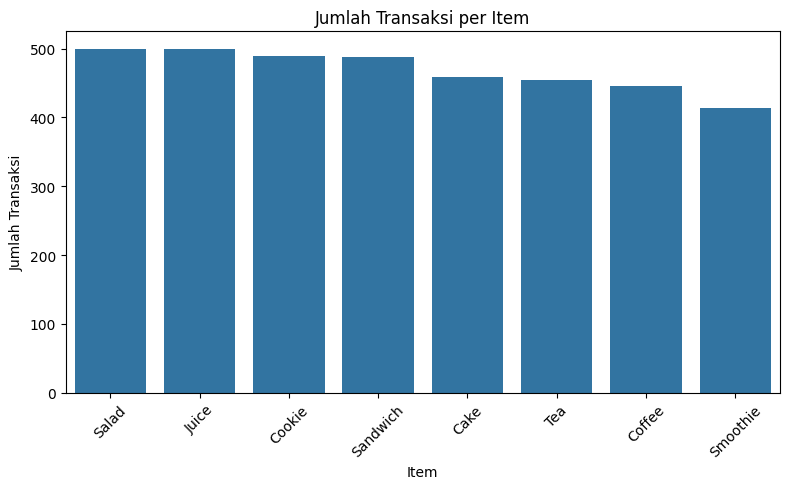

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Item', order=df_cleaned['Item'].value_counts().index)
plt.title('Jumlah Transaksi per Item')
plt.xlabel('Item')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


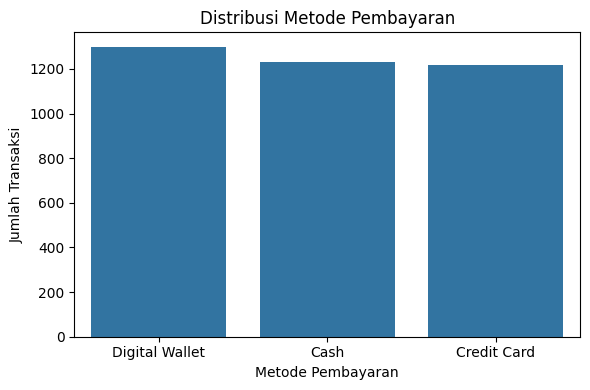

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='Payment Method', order=df_cleaned['Payment Method'].value_counts().index)
plt.title('Distribusi Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.tight_layout()
plt.show()


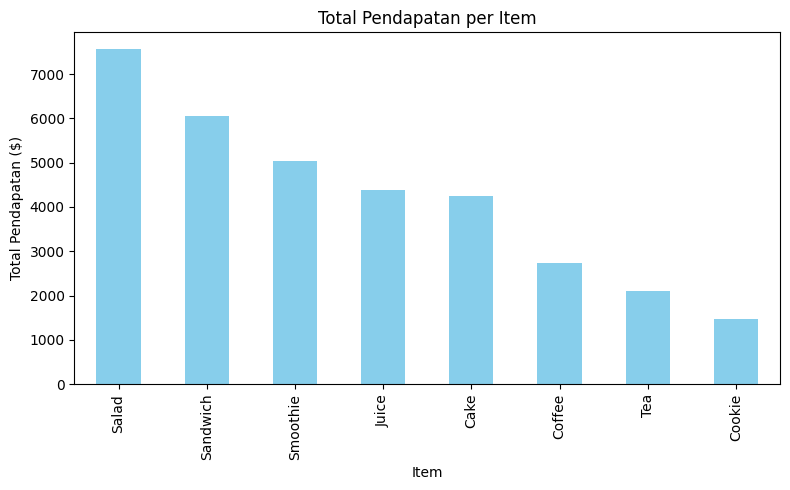

In [22]:
revenue_per_item = df_cleaned.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
revenue_per_item.plot(kind='bar', color='skyblue')
plt.title('Total Pendapatan per Item')
plt.xlabel('Item')
plt.ylabel('Total Pendapatan ($)')
plt.tight_layout()
plt.show()


In [23]:
print(df_cleaned['Transaction Date'].dtype)


datetime64[ns]


In [24]:
print(df_cleaned.dtypes)


Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object


In [25]:
# Hitung selisih absolut
df_cleaned['Calculated Total'] = df_cleaned['Quantity'] * df_cleaned['Price Per Unit']
df_cleaned['Difference'] = np.abs(df_cleaned['Total Spent'] - df_cleaned['Calculated Total'])

# Ambil baris yang tidak cocok (selisih lebih dari toleransi kecil, misal 0.01)
inconsistent = df_cleaned[df_cleaned['Difference'] > 0.01]

# Tampilkan jumlah dan contoh baris bermasalah
print(f"Jumlah baris dengan perbedaan: {len(inconsistent)}")
print(inconsistent[['Quantity', 'Price Per Unit', 'Total Spent', 'Calculated Total']].head())


Jumlah baris dengan perbedaan: 25
      Quantity  Price Per Unit  Total Spent  Calculated Total
278        3.0             3.0          8.0               9.0
629        3.0             3.0         12.0               9.0
1008       3.0             3.0          3.0               9.0
1436       3.0             3.0          6.0               9.0
1674       2.0             3.0          8.0               6.0


C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_3416\2405183398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Calculated Total'] = df_cleaned['Quantity'] * df_cleaned['Price Per Unit']
C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_3416\2405183398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Difference'] = np.abs(df_cleaned['Total Spent'] - df_cleaned['Calculated Total'])


In [26]:
# Hitung kolom pembantu dulu (jika belum ada)
df_cleaned['Calculated Total'] = df_cleaned['Quantity'] * df_cleaned['Price Per Unit']

# Filter data dengan selisih kecil (<= 0.01)
df_cleaned = df_cleaned[np.abs(df_cleaned['Total Spent'] - df_cleaned['Calculated Total']) <= 0.01].copy()

# Buang kolom bantu
df_cleaned.drop(columns=['Calculated Total'], inplace=True)

# Cek ulang jumlah baris setelah pembersihan
print(f"Jumlah baris setelah pembersihan: {len(df_cleaned)}")


Jumlah baris setelah pembersihan: 3723


C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_3416\924987976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Calculated Total'] = df_cleaned['Quantity'] * df_cleaned['Price Per Unit']


In [28]:
from scipy import stats
num_cols = ['Quantity', 'Price Per Unit', 'Total Spent']


In [29]:
# Hitung z-score
z_scores = np.abs(stats.zscore(df_cleaned[num_cols]))

# Threshold z-score, biasanya 3
threshold = 3

# Filter baris yang tidak mengandung outlier (semua z-score < threshold)
df_no_outliers_z = df_cleaned[(z_scores < threshold).all(axis=1)]

In [32]:
def iqr_winsorize(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorize: nilai di bawah lower_bound diganti dengan lower_bound, di atas upper_bound diganti upper_bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Terapkan winsorizing ke semua kolom numerik
df_winsorized = df_cleaned.copy()
for col in num_cols:
    df_winsorized = iqr_winsorize(df_winsorized, col)

print("Winsorizing selesai untuk kolom numerik.")


Winsorizing selesai untuk kolom numerik.


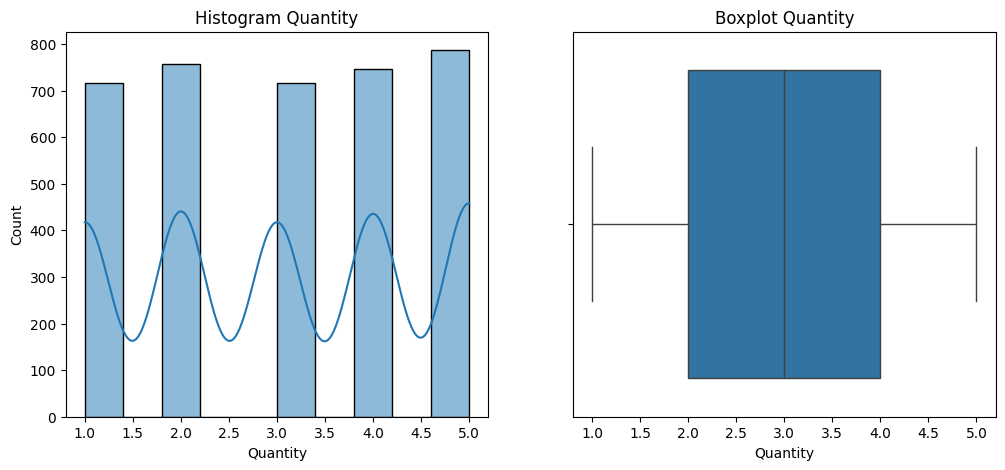

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Plot histogram dan boxplot Quantity
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_cleaned['Quantity'], bins=10, kde=True)
plt.title('Histogram Quantity')

plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned['Quantity'])
plt.title('Boxplot Quantity')

plt.show()


In [37]:
stat, p = shapiro(df_cleaned['Quantity'])
print(f'Statistik Shapiro-Wilk: {stat:.4f}, p-value: {p:.4f}')

if p > 0.05:
    print("Distribusi Quantity mendekati normal")
else:
    print("Distribusi Quantity tidak normal")


Statistik Shapiro-Wilk: 0.8861, p-value: 0.0000
Distribusi Quantity tidak normal


In [38]:
# Binning Quantity berdasarkan quartiles
df_cleaned['Quantity_Binned'] = pd.qcut(df_cleaned['Quantity'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Cek distribusi binning
print(df_cleaned['Quantity_Binned'].value_counts())


Quantity_Binned
Low            1473
High            787
Medium-High     747
Medium-Low      716
Name: count, dtype: int64


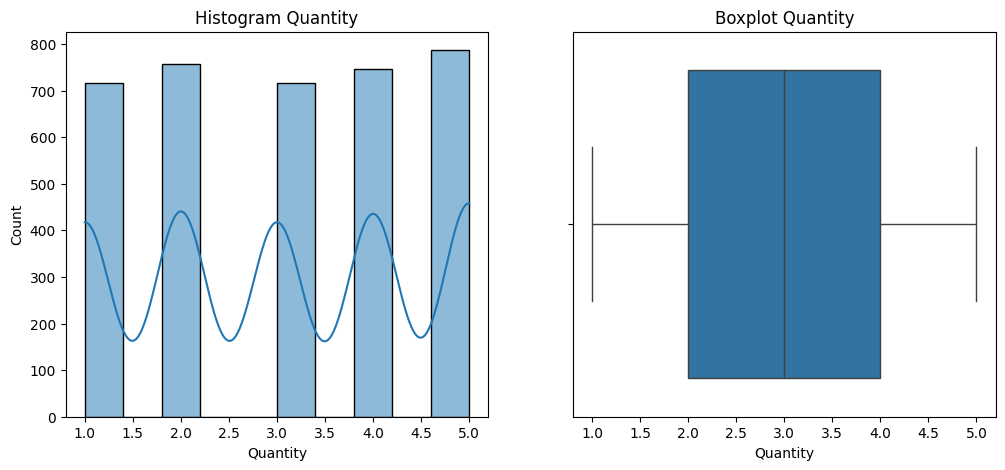

Statistik Shapiro-Wilk: 0.8861, p-value: 0.0000
Distribusi Quantity tidak normal


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Visualisasi distribusi Quantity
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_cleaned['Quantity'], bins=10, kde=True)
plt.title('Histogram Quantity')

plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned['Quantity'])
plt.title('Boxplot Quantity')

plt.show()

# Uji normalitas dengan Shapiro-Wilk
stat, p = shapiro(df_cleaned['Quantity'])
print(f'Statistik Shapiro-Wilk: {stat:.4f}, p-value: {p:.4f}')

if p > 0.05:
    print("Distribusi Quantity mendekati normal")
else:
    print("Distribusi Quantity tidak normal")


In [40]:
df_cleaned['Price_log'] = np.log1p(df_cleaned['Price Per Unit'])


In [41]:
df_cleaned['Price_sqrt'] = np.sqrt(df_cleaned['Price Per Unit'])


In [42]:
price_positive = df_cleaned['Price Per Unit'] + 1e-6

df_cleaned['Price_boxcox'], lam = stats.boxcox(price_positive)
print(f'Lambda Box-Cox untuk Price Per Unit: {lam}')

Lambda Box-Cox untuk Price Per Unit: 0.7198062725433545


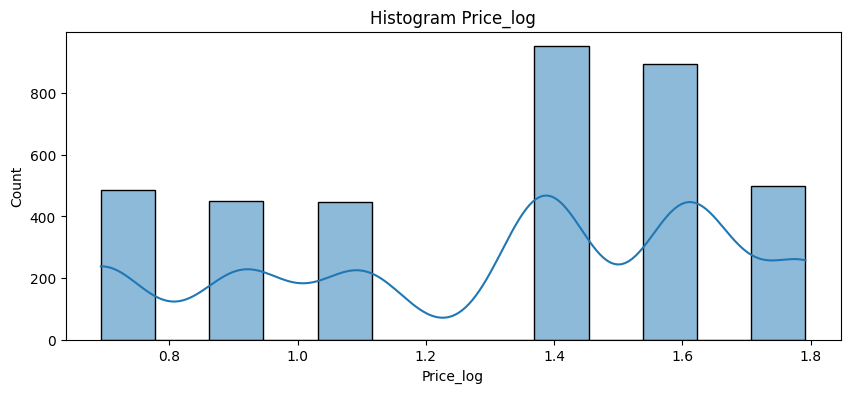

Statistik Shapiro-Wilk (Price_log): 0.8942, p-value: 0.0000
Distribusi Price_log tidak normal


In [43]:
col = 'Price_log'  # Bisa diganti ke Price_sqrt atau Price_boxcox

plt.figure(figsize=(10,4))
sns.histplot(df_cleaned[col], kde=True)
plt.title(f'Histogram {col}')
plt.show()

stat, p = shapiro(df_cleaned[col])
print(f'Statistik Shapiro-Wilk ({col}): {stat:.4f}, p-value: {p:.4f}')

if p > 0.05:
    print(f"Distribusi {col} mendekati normal")
else:
    print(f"Distribusi {col} tidak normal")

In [44]:
bins = [0, 1.5, 3, 4.5, df_cleaned['Price Per Unit'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High']

df_cleaned['Price_Binned_custom'] = pd.cut(df_cleaned['Price Per Unit'], bins=bins, labels=labels, include_lowest=True)

print(df_cleaned['Price_Binned_custom'].value_counts())


Price_Binned_custom
Low         1397
Very Low     934
Medium       893
High         499
Name: count, dtype: int64


In [46]:
print(df_cleaned['Price_Binned_custom'].value_counts())
print(df_cleaned['Price_Binned_custom'].value_counts(normalize=True))  # proporsi tiap bin


Price_Binned_custom
Low         1397
Very Low     934
Medium       893
High         499
Name: count, dtype: int64
Price_Binned_custom
Low         0.375235
Very Low    0.250873
Medium      0.239860
High        0.134032
Name: proportion, dtype: float64


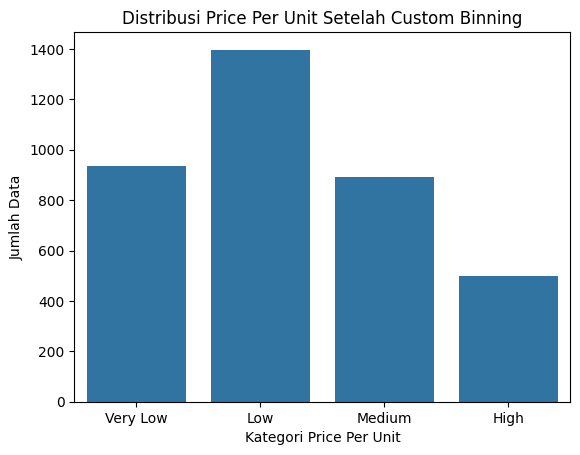

In [47]:
sns.countplot(x='Price_Binned_custom', data=df_cleaned, order=labels)
plt.title('Distribusi Price Per Unit Setelah Custom Binning')
plt.xlabel('Kategori Price Per Unit')
plt.ylabel('Jumlah Data')
plt.show()

In [48]:
import holidays

# Asumsi kolom 'Transaction Date' sudah dalam format datetime
df = df_cleaned.copy()

In [49]:

# 1. Dari tanggal
df['DayOfWeek'] = df['Transaction Date'].dt.day_name()  # Nama hari, contoh: Monday
df['Month'] = df['Transaction Date'].dt.month           # Bulan (1-12)
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)  # 1 kalau weekend, 0 kalau weekdays

# 2. Cek apakah tanggal termasuk hari libur nasional (Indonesia, sesuaikan jika perlu)
# Menggunakan library 'holidays' untuk cek hari libur
indonesia_holidays = holidays.Indonesia(years=df['Transaction Date'].dt.year.unique())
df['IsHoliday'] = df['Transaction Date'].isin(indonesia_holidays).astype(int)

# 3. Interaksi fitur

# Quantity × Price Per Unit
df['Quantity_x_Price'] = df['Quantity'] * df['Price Per Unit']

C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_3416\2549908343.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['IsHoliday'] = df['Transaction Date'].isin(indonesia_holidays).astype(int)


In [50]:
df['Item_x_Location'] = df['Item'] + '_' + df['Location']


In [52]:
categorical_cols = ['DayOfWeek', 'Item_x_Location']  # fitur kategori yang mau di-encode

# One-Hot Encoding dengan drop first untuk menghindari multikolinearitas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Cek hasil encoding
print(df_encoded.head())
print(f"Jumlah kolom setelah encoding: {df_encoded.shape[1]}")

   Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0     TXN_1961373  Coffee       2.0             2.0          4.0   
1     TXN_4977031    Cake       4.0             3.0         12.0   
2     TXN_4271903  Cookie       4.0             1.0          4.0   
4     TXN_3160411  Coffee       2.0             2.0          4.0   
10    TXN_2548360   Salad       5.0             5.0         25.0   

    Payment Method  Location Transaction Date  Difference Quantity_Binned  \
0      Credit Card  Takeaway       2023-09-08         0.0             Low   
1             Cash  In-store       2023-05-16         0.0     Medium-High   
2      Credit Card  In-store       2023-07-19         0.0     Medium-High   
4   Digital Wallet  In-store       2023-06-11         0.0             Low   
10            Cash  Takeaway       2023-11-07         0.0            High   

    ...  Item_x_Location_Juice_In-store  Item_x_Location_Juice_Takeaway  \
0   ...                           False              

In [53]:
df_encoded

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Difference,Quantity_Binned,...,Item_x_Location_Juice_In-store,Item_x_Location_Juice_Takeaway,Item_x_Location_Salad_In-store,Item_x_Location_Salad_Takeaway,Item_x_Location_Sandwich_In-store,Item_x_Location_Sandwich_Takeaway,Item_x_Location_Smoothie_In-store,Item_x_Location_Smoothie_Takeaway,Item_x_Location_Tea_In-store,Item_x_Location_Tea_Takeaway
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,0.0,Low,...,False,False,False,False,False,False,False,False,False,False
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,0.0,Medium-High,...,False,False,False,False,False,False,False,False,False,False
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,0.0,Medium-High,...,False,False,False,False,False,False,False,False,False,False
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,0.0,Low,...,False,False,False,False,False,False,False,False,False,False
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07,0.0,High,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,TXN_9933628,Smoothie,5.0,4.0,20.0,Cash,In-store,2023-07-20,0.0,High,...,False,False,False,False,False,False,True,False,False,False
9984,TXN_3142496,Smoothie,1.0,4.0,4.0,Cash,Takeaway,2023-07-27,0.0,Low,...,False,False,False,False,False,False,False,True,False,False
9986,TXN_2858441,Sandwich,2.0,4.0,8.0,Credit Card,In-store,2023-12-14,0.0,Low,...,False,False,False,False,True,False,False,False,False,False
9991,TXN_3897619,Sandwich,3.0,4.0,12.0,Cash,Takeaway,2023-02-24,0.0,Medium-Low,...,False,False,False,False,False,True,False,False,False,False


In [54]:
from sklearn.preprocessing import StandardScaler

# Pilih fitur numerik yang ingin distandarisasi
numeric_features = ['Quantity', 'Price Per Unit', 'Quantity_x_Price']

scaler = StandardScaler()

# Fit dan transform data numerik
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Cek hasil standarisasi
print(df_encoded[numeric_features].describe().T[['mean', 'std']])


                          mean       std
Quantity          8.206645e-17  1.000134
Price Per Unit   -5.630140e-17  1.000134
Quantity_x_Price -1.364593e-16  1.000134


In [55]:


df_encoded

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Difference,Quantity_Binned,...,Item_x_Location_Juice_In-store,Item_x_Location_Juice_Takeaway,Item_x_Location_Salad_In-store,Item_x_Location_Salad_Takeaway,Item_x_Location_Sandwich_In-store,Item_x_Location_Sandwich_Takeaway,Item_x_Location_Smoothie_In-store,Item_x_Location_Smoothie_Takeaway,Item_x_Location_Tea_In-store,Item_x_Location_Tea_Takeaway
0,TXN_1961373,Coffee,-0.728649,-0.729676,4.0,Credit Card,Takeaway,2023-09-08,0.0,Low,...,False,False,False,False,False,False,False,False,False,False
1,TXN_4977031,Cake,0.679114,0.040767,12.0,Cash,In-store,2023-05-16,0.0,Medium-High,...,False,False,False,False,False,False,False,False,False,False
2,TXN_4271903,Cookie,0.679114,-1.500120,4.0,Credit Card,In-store,2023-07-19,0.0,Medium-High,...,False,False,False,False,False,False,False,False,False,False
4,TXN_3160411,Coffee,-0.728649,-0.729676,4.0,Digital Wallet,In-store,2023-06-11,0.0,Low,...,False,False,False,False,False,False,False,False,False,False
10,TXN_2548360,Salad,1.382996,1.581655,25.0,Cash,Takeaway,2023-11-07,0.0,High,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,TXN_9933628,Smoothie,1.382996,0.811211,20.0,Cash,In-store,2023-07-20,0.0,High,...,False,False,False,False,False,False,True,False,False,False
9984,TXN_3142496,Smoothie,-1.432531,0.811211,4.0,Cash,Takeaway,2023-07-27,0.0,Low,...,False,False,False,False,False,False,False,True,False,False
9986,TXN_2858441,Sandwich,-0.728649,0.811211,8.0,Credit Card,In-store,2023-12-14,0.0,Low,...,False,False,False,False,True,False,False,False,False,False
9991,TXN_3897619,Sandwich,-0.024767,0.811211,12.0,Cash,Takeaway,2023-02-24,0.0,Medium-Low,...,False,False,False,False,False,True,False,False,False,False


In [57]:
from sklearn.model_selection import train_test_split, KFold


X = df_encoded.drop(columns=['Transaction ID', 'Transaction Date', 'Total Spent'])
y = df_encoded['Total Spent']

# 1. Split data jadi training dan testing (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 2. Setup K-Fold Cross Validation dengan 5 fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Contoh penggunaan KFold untuk training model (pseudo-code)
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    print(f'Fold {fold + 1}: Train size={len(X_tr)}, Validation size={len(X_val)}')

Fold 1: Train size=2382, Validation size=596
Fold 2: Train size=2382, Validation size=596
Fold 3: Train size=2382, Validation size=596
Fold 4: Train size=2383, Validation size=595
Fold 5: Train size=2383, Validation size=595


In [59]:
# Misal kita cek kolom numerik utama
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

for col in numeric_cols:
    # Coba konversi pakai pd.to_numeric dengan error coercion
    converted = pd.to_numeric(df_encoded[col], errors='coerce')
    
    # Cek ada berapa nilai yang gagal konversi (menjadi NaN)
    n_invalid = converted.isna().sum()
    
    if n_invalid > 0:
        print(f"Kolom '{col}' ada {n_invalid} nilai yang tidak bisa dikonversi ke float.")
    else:
        print(f"Kolom '{col}' semua nilai valid untuk konversi ke float.")


Kolom 'Quantity' semua nilai valid untuk konversi ke float.
Kolom 'Price Per Unit' semua nilai valid untuk konversi ke float.
Kolom 'Total Spent' semua nilai valid untuk konversi ke float.


In [64]:
X_train = X_train.drop(columns=['Item'])
X_test = X_test.drop(columns=['Item'])


In [68]:
print(X_train.dtypes)


Quantity                              float64
Price Per Unit                        float64
Payment Method                         object
Location                               object
Difference                            float64
Quantity_Binned                      category
Price_log                             float64
Price_sqrt                            float64
Price_boxcox                          float64
Price_Binned_custom                  category
Month                                   int32
IsWeekend                               int32
IsHoliday                               int32
Quantity_x_Price                      float64
DayOfWeek_Monday                         bool
DayOfWeek_Saturday                       bool
DayOfWeek_Sunday                         bool
DayOfWeek_Thursday                       bool
DayOfWeek_Tuesday                        bool
DayOfWeek_Wednesday                      bool
Item_x_Location_Cake_Takeaway            bool
Item_x_Location_Coffee_In-store   

In [69]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Payment Method', 'Location'], drop_first=True)


In [71]:
df_final = pd.get_dummies(df_cleaned, columns=['Payment Method', 'Location'], drop_first=True)


In [72]:
X = df_final.drop(columns=['Total Spent', 'Difference', 'Item'])  # hapus target dan kolom tidak relevan
y = df_final['Total Spent']


In [76]:
X_train


,Quantity,Price Per Unit,Payment Method,Location,Difference,Quantity_Binned,Price_log,Price_sqrt,Price_boxcox,Price_Binned_custom,...,Item_x_Location_Juice_In-store,Item_x_Location_Juice_Takeaway,Item_x_Location_Salad_In-store,Item_x_Location_Salad_Takeaway,Item_x_Location_Sandwich_In-store,Item_x_Location_Sandwich_Takeaway,Item_x_Location_Smoothie_In-store,Item_x_Location_Smoothie_Takeaway,Item_x_Location_Tea_In-store,Item_x_Location_Tea_Takeaway
5846,-1.432531,0.040767,Cash,In-store,0.0,Low,1.386294,1.732051,1.674248,Low,...,True,False,False,False,False,False,False,False,False,False
544,-0.024767,-1.114898,Credit Card,Takeaway,0.0,Medium-Low,0.916291,1.224745,0.470837,Very Low,...,False,False,False,False,False,False,False,False,False,True
8981,-0.728649,0.040767,Digital Wallet,Takeaway,0.0,Low,1.386294,1.732051,1.674248,Low,...,False,False,False,False,False,False,False,False,False,False
7336,-0.024767,-0.729676,Cash,Takeaway,0.0,Medium-Low,1.098612,1.414214,0.898799,Low,...,False,False,False,False,False,False,False,False,False,False
4224,-0.024767,0.040767,Cash,Takeaway,0.0,Medium-Low,1.386294,1.732051,1.674248,Low,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,-1.432531,-0.729676,Cash,In-store,0.0,Low,1.098612,1.414214,0.898799,Low,...,False,False,False,False,False,False,False,False,False,False
3447,1.382996,0.040767,Digital Wallet,Takeaway,0.0,High,1.386294,1.732051,1.674248,Low,...,False,False,False,False,False,False,False,False,False,False
2336,-1.432531,0.811211,Digital Wallet,Takeaway,0.0,Low,1.609438,2.000000,2.379085,Medium,...,False,False,False,False,False,False,False,True,False,False
9398,1.382996,0.811211,Digital Wallet,Takeaway,0.0,High,1.609438,2.000000,2.379085,Medium,...,False,False,False,False,False,True,False,False,False,False


In [78]:
X_test

,Quantity,Price Per Unit,Payment Method,Location,Difference,Quantity_Binned,Price_log,Price_sqrt,Price_boxcox,Price_Binned_custom,...,Item_x_Location_Juice_In-store,Item_x_Location_Juice_Takeaway,Item_x_Location_Salad_In-store,Item_x_Location_Salad_Takeaway,Item_x_Location_Sandwich_In-store,Item_x_Location_Sandwich_Takeaway,Item_x_Location_Smoothie_In-store,Item_x_Location_Smoothie_Takeaway,Item_x_Location_Tea_In-store,Item_x_Location_Tea_Takeaway
5511,-0.728649,1.581655,Credit Card,In-store,0.0,Low,1.791759,2.236068,3.035678,High,...,False,False,True,False,False,False,False,False,False,False
8674,0.679114,-0.729676,Credit Card,Takeaway,0.0,Medium-High,1.098612,1.414214,0.898799,Low,...,False,False,False,False,False,False,False,False,False,False
4763,-1.432531,0.040767,Digital Wallet,Takeaway,0.0,Low,1.386294,1.732051,1.674248,Low,...,False,True,False,False,False,False,False,False,False,False
8891,0.679114,0.811211,Credit Card,Takeaway,0.0,Medium-High,1.609438,2.000000,2.379085,Medium,...,False,False,False,False,False,True,False,False,False,False
5506,0.679114,-0.729676,Digital Wallet,In-store,0.0,Medium-High,1.098612,1.414214,0.898799,Low,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,1.382996,0.040767,Cash,Takeaway,0.0,High,1.386294,1.732051,1.674248,Low,...,False,True,False,False,False,False,False,False,False,False
3291,1.382996,0.811211,Digital Wallet,In-store,0.0,High,1.609438,2.000000,2.379085,Medium,...,False,False,False,False,False,False,True,False,False,False
3611,-0.728649,0.811211,Credit Card,Takeaway,0.0,Low,1.609438,2.000000,2.379085,Medium,...,False,False,False,False,False,False,False,True,False,False
4201,-0.024767,0.811211,Credit Card,In-store,0.0,Medium-Low,1.609438,2.000000,2.379085,Medium,...,False,False,False,False,True,False,False,False,False,False


In [81]:
numerical_cols = ['Quantity', 'Price Per Unit', 'Price_log', 'Price_sqrt', 'Price_boxcox']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_num_scaled = scaler.fit_transform(X[numerical_cols])
X_dummy = X.drop(columns=numerical_cols + ['Transaction ID', 'Transaction Date']).values  # buang ID dan tanggal juga

import numpy as np
X_final = np.hstack([X_num_scaled, X_dummy])


In [91]:
# Misal X adalah dataframe asli
X = df[['Quantity', 'Price Per Unit', 'Quantity_Binned', 'Price_Binned_custom', 'Payment Method', 'Location']]

# Encoding kategori pakai pd.get_dummies()
X_encoded = pd.get_dummies(X, drop_first=True)

# Scaling kolom numerik setelah encoding
numerical_cols = ['Quantity', 'Price Per Unit']
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])


In [92]:
# Misal target variable-nya 'Total Spent' (ganti sesuai target sebenarnya)
y = df['Total Spent']

# Split data jadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

In [93]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 3.6674
R^2 Score: 0.8964


In [96]:
# Ambil koefisien model
coefs = model.coef_

# Buat dataframe fitur dan koefisiennya
coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': coefs
})

# Tambahkan kolom koefisien absolut
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

# Urutkan berdasarkan koefisien absolut descending
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df_sorted)

                          Feature  Coefficient  Abs_Coefficient
0                        Quantity     4.194636         4.194636
1                  Price Per Unit     3.817263         3.817263
6      Price_Binned_custom_Medium     0.253957         0.253957
7        Price_Binned_custom_High     0.244894         0.244894
9   Payment Method_Digital Wallet     0.123042         0.123042
3     Quantity_Binned_Medium-High    -0.121925         0.121925
4            Quantity_Binned_High     0.101607         0.101607
8      Payment Method_Credit Card     0.085113         0.085113
2      Quantity_Binned_Medium-Low    -0.064125         0.064125
5         Price_Binned_custom_Low     0.046650         0.046650
10              Location_Takeaway    -0.042123         0.042123


C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_3416\1728333450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


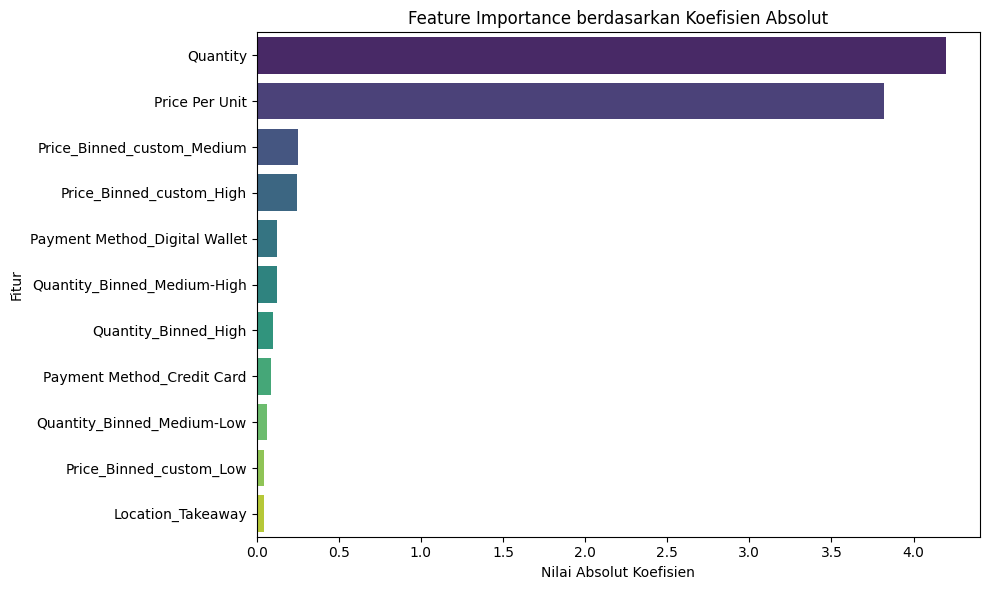

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Abs_Coefficient',
    y='Feature',
    data=coef_df_sorted,
    palette='viridis'
)
plt.title('Feature Importance berdasarkan Koefisien Absolut')
plt.xlabel('Nilai Absolut Koefisien')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

In [102]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:

# Copy data fitur
X_vif = X_encoded.copy()

# Ubah kolom boolean ke integer agar bisa diproses
for col in X_vif.columns:
    if X_vif[col].dtype == 'bool':
        X_vif[col] = X_vif[col].astype(int)

# Tambahkan konstanta untuk intercept
X_vif_const = sm.add_constant(X_vif)

# Pastikan semua kolom numeric
assert all(np.issubdtype(dtype, np.number) for dtype in X_vif_const.dtypes), "Semua kolom harus numerik"

# Hitung VIF untuk setiap fitur (kecuali konstanta)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

print(vif_data)

                          Feature        VIF
0                           const  60.863997
1                        Quantity  20.453892
2                  Price Per Unit  17.385257
3      Quantity_Binned_Medium-Low   4.681884
4     Quantity_Binned_Medium-High  11.254525
5            Quantity_Binned_High  21.760855
6         Price_Binned_custom_Low   6.579181
7      Price_Binned_custom_Medium  15.818384
8        Price_Binned_custom_High  18.254790
9      Payment Method_Credit Card   1.346081
10  Payment Method_Digital Wallet   1.347384
11              Location_Takeaway   1.003374


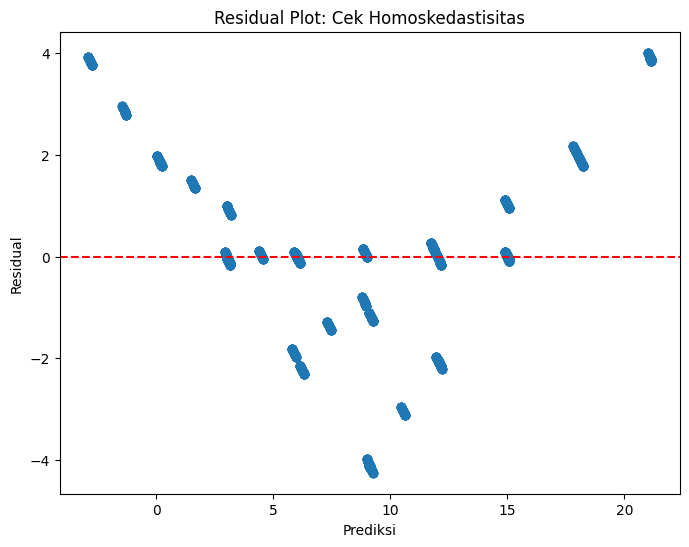

In [106]:
import matplotlib.pyplot as plt

# Prediksi dan residual
y_pred = model.predict(X_encoded)
residuals = y - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Prediksi')
plt.ylabel('Residual')
plt.title('Residual Plot: Cek Homoskedastisitas')
plt.show()


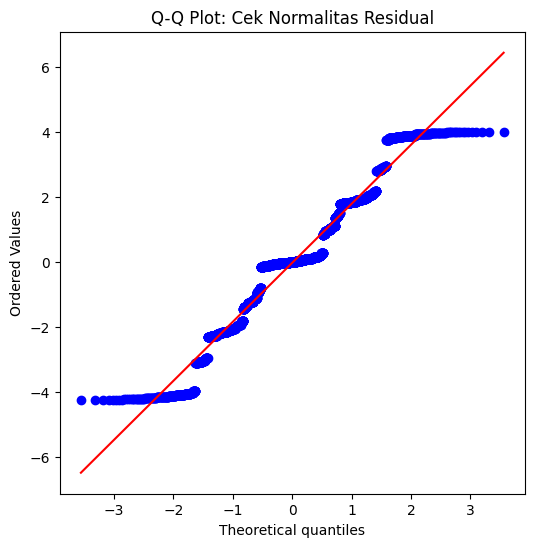

In [107]:
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot: Cek Normalitas Residual')
plt.show()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model regresi
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi hanya pada data test
y_pred = model.predict(X_test)

# Hitung residual
residuals = y_test - y_pred

# Ringkasan statistik residual
residual_summary = pd.Series(residuals).describe()
print("📊 Ringkasan Statistik Residual:")
print(residual_summary)

# Korelasi antara prediksi dan residual
correlation = np.corrcoef(y_pred, residuals)[0, 1]
print(f"\n🔍 Korelasi Prediksi vs Residual: {correlation:.4f} (idealnya mendekati 0)")

# Uji normalitas residual: Shapiro-Wilk Test
stat, p_value = shapiro(residuals)
print("\n🧪 Uji Normalitas (Shapiro-Wilk):")
print(f"Statistik = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("✅ Residual kemungkinan berdistribusi normal.")
else:
    print("⚠️ Residual kemungkinan TIDAK normal.")

📊 Ringkasan Statistik Residual:
count    745.000000
mean      -0.147579
std        1.910626
min       -4.246938
25%       -1.402129
50%       -0.007816
75%        0.986901
max        4.006510
Name: Total Spent, dtype: float64

🔍 Korelasi Prediksi vs Residual: 0.0053 (idealnya mendekati 0)

🧪 Uji Normalitas (Shapiro-Wilk):
Statistik = 0.9610, p-value = 0.0000
⚠️ Residual kemungkinan TIDAK normal.


In [109]:
# Uji normalitas dengan Shapiro-Wilk Test
from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print("\nUji Shapiro-Wilk untuk Normalitas Residual:")
print(f"Statistik = {stat:.4f}, p-value = {p_value:.4f}")

if p_value > 0.05:
    print("✅ Residual terdistribusi normal (tidak tolak H0)")
else:
    print("⚠️ Residual kemungkinan tidak normal (tolak H0)")



Uji Shapiro-Wilk untuk Normalitas Residual:
Statistik = 0.9574, p-value = 0.0000
⚠️ Residual kemungkinan tidak normal (tolak H0)


In [111]:
# Prediksi untuk training dan testing set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Hitung R² untuk training dan testing
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² Score - Training Set: {r2_train:.4f}")
print(f"R² Score - Testing Set: {r2_test:.4f}")


R² Score - Training Set: 0.9093
R² Score - Testing Set: 0.8964


In [114]:
print(X_encoded.columns)
df_corr = pd.concat([X_encoded, y], axis=1).corr()
print(df_corr['Total Spent'].sort_values(ascending=False))


Index(['Quantity', 'Price Per Unit', 'Quantity_Binned_Medium-Low',
       'Quantity_Binned_Medium-High', 'Quantity_Binned_High',
       'Price_Binned_custom_Low', 'Price_Binned_custom_Medium',
       'Price_Binned_custom_High', 'Payment Method_Credit Card',
       'Payment Method_Digital Wallet', 'Location_Takeaway'],
      dtype='object')
Total Spent                      1.000000
Quantity                         0.699633
Price Per Unit                   0.653886
Quantity_Binned_High             0.513549
Price_Binned_custom_High         0.399938
Price_Binned_custom_Medium       0.311265
Quantity_Binned_Medium-High      0.220898
Payment Method_Digital Wallet   -0.000663
Quantity_Binned_Medium-Low      -0.007874
Payment Method_Credit Card      -0.009615
Location_Takeaway               -0.034999
Price_Binned_custom_Low         -0.111481
Name: Total Spent, dtype: float64


In [115]:
df['Check_Total'] = df['Quantity'] * df['Price Per Unit']
correlation = df['Total Spent'].corr(df['Check_Total'])
print(f"Korelasi Quantity x Price vs Total Spent: {correlation:.4f}")


Korelasi Quantity x Price vs Total Spent: 1.0000


In [120]:
# 1. Lihat 5 baris pertama target
print(y.head())

# 2. Statistik deskriptif target (mean, std, min, max, dll)
print(y.describe())

# 3. Cek tipe data target
print(y.dtype)

# 4. Cek jumlah missing value di target
print(y.isnull().sum())

0      4.0
1     12.0
2      4.0
4      4.0
10    25.0
Name: Total Spent, dtype: float64
count    3723.000000
mean        8.966022
std         6.074397
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        25.000000
Name: Total Spent, dtype: float64
float64
0


In [121]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Asumsi X_encoded dan y sudah disiapkan

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha bisa di-tuning
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression:")
print(f"R² Training: {ridge.score(X_train, y_train):.4f}")
print(f"R² Testing: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"MSE Testing: {mean_squared_error(y_test, y_pred_ridge):.4f}")

# Lasso Regression
lasso = Lasso(alpha=0.1)  # alpha bisa di-tuning, umumnya lebih kecil dari Ridge
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nLasso Regression:")
print(f"R² Training: {lasso.score(X_train, y_train):.4f}")
print(f"R² Testing: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"MSE Testing: {mean_squared_error(y_test, y_pred_lasso):.4f}")

Ridge Regression:
R² Training: 0.9093
R² Testing: 0.8964
MSE Testing: 3.6678

Lasso Regression:
R² Training: 0.9085
R² Testing: 0.8965
MSE Testing: 3.6645


In [128]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Pipeline: PolynomialFeatures + Ridge Regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Misal X_encoded dan y sudah disiapkan (fitur dan target)

# Buat pipeline polynomial + scaler + ridge
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.01))
])

# Hitung cross-validation R2 dengan 5 fold
cv_scores = cross_val_score(pipeline, X_encoded, y, cv=5, scoring='r2')

print("Cross-validation R² scores:", cv_scores)
print("Rata-rata CV R²:", np.mean(cv_scores))


Cross-validation R² scores: [1. 1. 1. 1. 1.]
Rata-rata CV R²: 0.9999999992037472


In [132]:
X_train# 1. Distribusi target
print("Distribusi Target (Total Spent):")
print(y.value_counts(normalize=True).sort_index())
print("\nStatistik Target:")
print(y.describe())

# 2. Distribusi fitur numerik
numerical_features = ['Quantity', 'Price Per Unit']  # sesuaikan
print("\nStatistik Fitur Numerik:")
print(X_encoded[numerical_features].describe())

# 3. Korelasi fitur dengan target
corr = X_encoded.corrwith(y).sort_values(ascending=False)
print("\nKorelasi Fitur dengan Target:")
print(corr)

# 4. Cek apakah ada fitur sama persis dengan target (potensi leakage)
for col in X_encoded.columns:
    if np.array_equal(X_encoded[col].values, y.values):
        print(f"\n⚠️ Potensi kebocoran data: fitur '{col}' identik dengan target!")

# 5. Cek overlap data train-test (harusnya sudah terpisah dengan benar)
print("\nCek jumlah data train dan test:")
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

# Cek apakah ada data yang sama persis ada di train dan test
train_test_overlap = pd.merge(X_train.reset_index(), X_test.reset_index(), how='inner', on=X_train.columns.tolist())
print(f"\nJumlah data yang sama persis di train dan test: {train_test_overlap.shape[0]}")

Distribusi Target (Total Spent):
Total Spent
1.0     0.027129
1.5     0.021757
2.0     0.052646
3.0     0.093473
4.0     0.095085
4.5     0.024443
5.0     0.051303
6.0     0.104486
7.5     0.025517
8.0     0.067419
9.0     0.049423
10.0    0.055332
12.0    0.103143
15.0    0.072791
16.0    0.045125
20.0    0.081386
25.0    0.029546
Name: proportion, dtype: float64

Statistik Target:
count    3723.000000
mean        8.966022
std         6.074397
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        25.000000
Name: Total Spent, dtype: float64

Statistik Fitur Numerik:
           Quantity  Price Per Unit
count  3.723000e+03    3.723000e+03
mean   8.206645e-17   -5.630140e-17
std    1.000134e+00    1.000134e+00
min   -1.432531e+00   -1.500120e+00
25%   -7.286489e-01   -1.114898e+00
50%   -2.476726e-02    4.076750e-02
75%    6.791144e-01    8.112111e-01
max    1.382996e+00    1.581655e+00

Korelasi Fitur dengan Target:
Quantity                       

In [133]:
print(f"Total data awal: {df.shape[0]}")
print(f"Jumlah data duplikat: {df.duplicated().sum()}")
df_cleaned = df.drop_duplicates()
print(f"Data setelah hapus duplikat: {df_clean.shape[0]}")


Total data awal: 3723
Jumlah data duplikat: 0
Data setelah hapus duplikat: 3723


In [134]:
print(f"Jumlah index train: {X_train.index.nunique()}")
print(f"Jumlah index test: {X_test.index.nunique()}")

overlap_index = set(X_train.index).intersection(set(X_test.index))
print(f"Jumlah index yang sama di train dan test: {len(overlap_index)}")


Jumlah index train: 2978
Jumlah index test: 745
Jumlah index yang sama di train dan test: 0


In [135]:
# Gunakan hashing untuk tiap baris supaya lebih efisien
import hashlib

def hash_row(row):
    return hashlib.md5(row.values.tobytes()).hexdigest()

train_hashes = X_train.apply(hash_row, axis=1)
test_hashes = X_test.apply(hash_row, axis=1)

overlap_hashes = set(train_hashes).intersection(set(test_hashes))
print(f"Jumlah baris sama persis di train dan test berdasarkan hash: {len(overlap_hashes)}")


Jumlah baris sama persis di train dan test berdasarkan hash: 0


In [136]:
# Buat hash setiap baris di train dan test (dari fitur)
hash_train = X_train.apply(lambda row: hash(tuple(row)), axis=1)
hash_test = X_test.apply(lambda row: hash(tuple(row)), axis=1)

# Cari irisan hash yang sama
common_hashes = set(hash_train).intersection(set(hash_test))

print("Jumlah baris sama persis di train dan test:", len(common_hashes))

Jumlah baris sama persis di train dan test: 175


In [137]:
df = df.drop_duplicates()


In [139]:
# Ambil index baris yang sama persis di train dan test
common_indexes = set(hash_train).intersection(set(hash_test))

# Hapus baris dengan hash yang sama dari test (atau train)
X_test = X_test[~X_test.apply(lambda row: hash(tuple(row)), axis=1).isin(common_indexes)]
y_test = y_test.loc[X_test.index]


In [140]:
# Hitung hash setiap baris di train dan test
hash_train = X_train.apply(lambda row: hash(tuple(row)), axis=1)
hash_test = X_test.apply(lambda row: hash(tuple(row)), axis=1)

# Cari irisan hash yang sama persis
common_hashes = set(hash_train).intersection(set(hash_test))

# Hitung jumlah data yang sama persis
jumlah_sama = len(common_hashes)

print(f"Jumlah data yang sama persis di train dan test: {jumlah_sama}")

Jumlah data yang sama persis di train dan test: 0


In [141]:
# Filter test untuk hapus data yang sama dengan train
X_test_clean = X_test[~hash_test.isin(common_hashes)]
y_test_clean = y_test.loc[X_test_clean.index]

print(f"Ukuran test setelah bersih: {len(X_test_clean)}")


Ukuran test setelah bersih: 0


In [143]:
# Reset index tanpa menambahkan kolom index baru
X_train_reset = X_train.reset_index(drop=True)
X_test_reset = X_test.reset_index(drop=True)

# Merge cari overlap persis sama
train_test_overlap = pd.merge(X_train_reset, X_test_reset, how='inner', on=X_train.columns.tolist())

print(f"Jumlah data train: {X_train.shape[0]}")
print(f"Jumlah data test: {X_test.shape[0]}")
print(f"Jumlah data yang sama persis di train dan test: {train_test_overlap.shape[0]}")


Jumlah data train: 2978
Jumlah data test: 0
Jumlah data yang sama persis di train dan test: 0


In [144]:
print("Sebelum filtering, size test:", X_test.shape[0])


Sebelum filtering, size test: 0


In [145]:
print(f"Ukuran test sebelum filtering: {X_test.shape[0]}")
print(f"Ukuran test setelah filtering: {X_test_clean.shape[0]}")  # jika pakai filtering


Ukuran test sebelum filtering: 0
Ukuran test setelah filtering: 0


In [146]:
print(f"Ukuran X_encoded: {X_encoded.shape}")


Ukuran X_encoded: (3723, 11)


In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"Ukuran train: {X_train.shape[0]}, ukuran test: {X_test.shape[0]}")


Ukuran train: 2978, ukuran test: 745


In [148]:

# Buat hash untuk tiap baris train dan test
hash_train = X_train.apply(lambda row: hash(tuple(row)), axis=1)
hash_test = X_test.apply(lambda row: hash(tuple(row)), axis=1)

# Cari hash yang sama di train dan test
common_hashes = set(hash_train) & set(hash_test)
print(f"Jumlah hash yang sama di train dan test: {len(common_hashes)}")

# Filter test untuk hapus baris dengan hash sama
X_test_clean = X_test[~hash_test.isin(common_hashes)]
y_test_clean = y_test.loc[X_test_clean.index]

print(f"Ukuran test sebelum filtering: {len(X_test)}")
print(f"Ukuran test setelah filtering: {len(X_test_clean)}")

Jumlah hash yang sama di train dan test: 175
Ukuran test sebelum filtering: 745
Ukuran test setelah filtering: 0


In [149]:
# Gabung X_encoded & y jadi satu DataFrame lengkap
df_full = X_encoded.copy()
df_full['Total Spent'] = y

# Hapus duplikat baris
df_full_nodup = df_full.drop_duplicates()

print(f"Jumlah data awal: {len(df_full)}")
print(f"Jumlah data setelah hapus duplikat: {len(df_full_nodup)}")

# Pisah fitur & target lagi setelah hapus duplikat
X_clean = df_full_nodup.drop(columns=['Total Spent'])
y_clean = df_full_nodup['Total Spent']

# Split ulang
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42)

# Cek overlap hash setelah split
hash_train = X_train.apply(lambda row: hash(tuple(row)), axis=1)
hash_test = X_test.apply(lambda row: hash(tuple(row)), axis=1)
common_hashes = set(hash_train) & set(hash_test)
print(f"Jumlah hash sama di train dan test setelah hapus duplikat: {len(common_hashes)}")


Jumlah data awal: 3723
Jumlah data setelah hapus duplikat: 180
Jumlah hash sama di train dan test setelah hapus duplikat: 0


In [151]:
subset_cols = X.columns.tolist()  # semua fitur
dupes = df.duplicated(subset=subset_cols)
print(f"Jumlah duplikat berdasarkan fitur saja: {dupes.sum()}")


Jumlah duplikat berdasarkan fitur saja: 3543


In [152]:
df_unique_subset = df.drop_duplicates(subset=subset_cols)
print(f"Jumlah data setelah hapus duplikat fitur: {len(df_unique_subset)}")


Jumlah data setelah hapus duplikat fitur: 180


In [155]:
# Cek tipe kolom di fitur
print(X.dtypes)

# Pilih hanya kolom numerik
X_numeric = X.select_dtypes(include=[np.number])

print(f"Fitur numerik yang dipakai: {list(X_numeric.columns)}")


Transaction ID                 object
Item                           object
Quantity                      float64
Price Per Unit                float64
Payment Method                 object
Location                       object
Transaction Date       datetime64[ns]
Difference                    float64
Quantity_Binned              category
Price_log                     float64
Price_sqrt                    float64
Price_boxcox                  float64
Price_Binned_custom          category
DayOfWeek                      object
Month                           int32
IsWeekend                       int32
IsHoliday                       int32
Quantity_x_Price              float64
Item_x_Location                object
Check_Total                   float64
dtype: object
Fitur numerik yang dipakai: ['Quantity', 'Price Per Unit', 'Difference', 'Price_log', 'Price_sqrt', 'Price_boxcox', 'Month', 'IsWeekend', 'IsHoliday', 'Quantity_x_Price', 'Check_Total']


In [160]:
# Cek duplikat di X (fitur)
duplicate_X = X.duplicated().sum()
print(f"Jumlah duplikat di fitur (X): {duplicate_X}")

# Cek duplikat di y (target)
duplicate_y = y.duplicated().sum()
print(f"Jumlah duplikat di target (y): {duplicate_y}")

# Cek duplikat di kombinasi X dan y (gabungan fitur dan target)
combined = X.copy()
combined['target'] = y
duplicate_combined = combined.duplicated().sum()
print(f"Jumlah duplikat di kombinasi fitur dan target: {duplicate_combined}")


Jumlah duplikat di fitur (X): 356
Jumlah duplikat di target (y): 3706
Jumlah duplikat di kombinasi fitur dan target: 356


In [161]:
combined = X.copy()
combined['target'] = y

combined_unique = combined.drop_duplicates()

X_unique = combined_unique.drop(columns=['target'])
y_unique = combined_unique['target']

print(f"Data unik setelah hapus duplikat: {len(combined_unique)}")


Data unik setelah hapus duplikat: 3367


In [166]:
# Cek duplikat di fitur (X_unique)
num_duplicates_X = X_unique.duplicated().sum()
print(f"Jumlah duplikat di fitur (X_unique): {num_duplicates_X}")

# Cek duplikat di target (y_unique)
num_duplicates_y = y_unique.duplicated().sum()
print(f"Jumlah duplikat di target (y_unique): {num_duplicates_y}")

# Cek duplikat di kombinasi fitur + target
combined = X_unique.copy()
combined['target'] = y_unique.values  # pastikan urutan sama
num_duplicates_combined = combined.duplicated().sum()
print(f"Jumlah duplikat di kombinasi fitur dan target: {num_duplicates_combined}")


Jumlah duplikat di fitur (X_unique): 0
Jumlah duplikat di target (y_unique): 3350
Jumlah duplikat di kombinasi fitur dan target: 0


In [167]:
df_clean = df.drop(columns=['Transaction ID', 'Transaction Date'])

# Pisahkan fitur dan target
X = df_clean.drop(columns=['Total Spent'])
y = df_clean['Total Spent']

# Gabungkan X dan y untuk cek duplikat baris secara keseluruhan
df_all = X.copy()
df_all['Total Spent'] = y

# Hapus duplikat baris (gabungan fitur + target)
df_unique = df_all.drop_duplicates()

# Pisahkan lagi fitur dan target yang sudah bersih
X_unique = df_unique.drop(columns=['Total Spent'])
y_unique = df_unique['Total Spent']

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data setelah hapus duplikat fitur + target: {len(df_unique)}")

# Cek apakah masih ada duplikat fitur saja
print("Jumlah duplikat fitur (X_unique):", X_unique.duplicated().sum())
# Cek apakah ada duplikat target saja
print("Jumlah duplikat target (y_unique):", y_unique.duplicated().sum())

Jumlah data awal: 3723
Jumlah data setelah hapus duplikat fitur + target: 3367
Jumlah duplikat fitur (X_unique): 0
Jumlah duplikat target (y_unique): 3350


In [171]:
# Tentukan fitur kategori dan numerik
categorical_features = ['Item', 'Payment Method', 'Location', 'DayOfWeek', 'Item_x_Location',
                        'Quantity_Binned', 'Price_Binned_custom']  # contoh, sesuaikan
numerical_features = [col for col in X_unique.columns if col not in categorical_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_unique, y_unique, test_size=0.2, random_state=42)

# Buat preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Pipeline lengkap dengan model Ridge
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

# Train model
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test R^2: {r2_score(y_test, y_pred):.4f}")

Test MSE: 0.0000
Test R^2: 1.0000


In [177]:
model = Ridge(alpha=1.0)

# 1. Cek ukuran data test
print(f"Ukuran data train: {X_train.shape[0]}")
print(f"Ukuran data test: {X_test.shape[0]}")

# 2. Cek distribusi target di train dan test
print("\nDistribusi target di train:")
print(y_train.value_counts(normalize=True).sort_index())
print("\nDistribusi target di test:")
print(y_test.value_counts(normalize=True).sort_index())


Ukuran data train: 2693
Ukuran data test: 674

Distribusi target di train:
Total Spent
1.0     0.026365
1.5     0.021166
2.0     0.053101
3.0     0.096175
4.0     0.095804
4.5     0.022280
5.0     0.049759
6.0     0.102859
7.5     0.024508
8.0     0.069439
9.0     0.051244
10.0    0.057928
12.0    0.100631
15.0    0.074267
16.0    0.046788
20.0    0.077980
25.0    0.029707
Name: proportion, dtype: float64

Distribusi target di test:
Total Spent
1.0     0.029674
1.5     0.026706
2.0     0.038576
3.0     0.096439
4.0     0.089021
4.5     0.031157
5.0     0.063798
6.0     0.109792
7.5     0.029674
8.0     0.065282
9.0     0.041543
10.0    0.044510
12.0    0.114243
15.0    0.066766
16.0    0.041543
20.0    0.083086
25.0    0.028190
Name: proportion, dtype: float64


In [173]:
# Misal list fitur numerik yang sudah didefinisikan
numerical_features = ['Quantity', 'Price Per Unit', 'Difference', 'Price_log', 'Price_sqrt',
                      'Price_boxcox', 'Month', 'IsWeekend', 'IsHoliday', 'Quantity_x_Price', 'Check_Total']

# Ambil subset fitur numerik saja dari X_train
X_train_num = X_train[numerical_features]

# Gabungkan dengan target
df_train_num = pd.concat([X_train_num, y_train], axis=1)

# Hitung korelasi
corr = df_train_num.corr()
target_corr = corr[y_train.name].drop(y_train.name)

print("\nKorelasi fitur numerik dengan target:")
print(target_corr)

# Cek fitur dengan korelasi sangat tinggi
leak_features = target_corr[abs(target_corr) >= 0.9999].index.tolist()
if leak_features:
    print(f"\n⚠️ Fitur berpotensi bocor (korelasi >= 0.9999): {leak_features}")
else:
    print("\nTidak ada fitur numerik dengan korelasi sangat tinggi ke target.")


Korelasi fitur numerik dengan target:
Quantity            0.703390
Price Per Unit      0.644456
Difference               NaN
Price_log           0.636469
Price_sqrt          0.640438
Price_boxcox        0.643197
Month              -0.001497
IsWeekend           0.011268
IsHoliday          -0.008936
Quantity_x_Price    1.000000
Check_Total         1.000000
Name: Total Spent, dtype: float64

⚠️ Fitur berpotensi bocor (korelasi >= 0.9999): ['Quantity_x_Price', 'Check_Total']


In [179]:
X_train = X_train.drop(columns=['Quantity_x_Price', 'Check_Total'])
X_test = X_test.drop(columns=['Quantity_x_Price', 'Check_Total'])


In [180]:

# Split data (jika belum)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Hapus fitur bocor
leaky_features = ['Quantity_x_Price', 'Check_Total']
X_train = X_train.drop(columns=leaky_features, errors='ignore')
X_test = X_test.drop(columns=leaky_features, errors='ignore')

# Identifikasi fitur kategorikal dan numerik
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', 'passthrough', numeric_features)
])

# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Training model
model.fit(X_train, y_train)

# Evaluasi pada test set
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test R^2: {r2_score(y_test, y_pred):.4f}")

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train,
# Split data (jika belum)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Hapus fitur bocor
leaky_features = ['Quantity_x_Price', 'Check_Total']
X_train = X_train.drop(columns=leaky_features, errors='ignore')
X_test = X_test.drop(columns=leaky_features, errors='ignore')

# Identifikasi fitur kategorikal dan numerik
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', 'passthrough', numeric_features)
])

# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Training model
model.fit(X_train, y_train)

# Evaluasi pada test set
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test R^2: {r2_score(y_test, y_pred):.4f}")

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Average CV R^2: {cv_scores.mean():.4f}")y_train, cv=kf, scoring='r2')
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Average CV R^2: {cv_scores.mean():.4f}")

Test MSE: 3.6501
Test R^2: 0.8969
Cross-validation R^2 scores: [0.91345934 0.90043968 0.9078803  0.90924265 0.90502687]
Average CV R^2: 0.9072


In [184]:
print(X_train.columns)
print("Columns in X_train:")
print(X_train.columns.tolist())

print("Categorical features list:")
print(categorical_features)


Index(['Item', 'Quantity', 'Price Per Unit', 'Payment Method', 'Location',
       'Difference', 'Quantity_Binned', 'Price_log', 'Price_sqrt',
       'Price_boxcox', 'Price_Binned_custom', 'DayOfWeek', 'Month',
       'IsWeekend', 'IsHoliday', 'Item_x_Location'],
      dtype='object')
Columns in X_train:
['Item', 'Quantity', 'Price Per Unit', 'Payment Method', 'Location', 'Difference', 'Quantity_Binned', 'Price_log', 'Price_sqrt', 'Price_boxcox', 'Price_Binned_custom', 'DayOfWeek', 'Month', 'IsWeekend', 'IsHoliday', 'Item_x_Location']
Categorical features list:
['Product Type', 'AnotherCategoricalFeature']


In [185]:
categorical_features = ['Item', 'Payment Method', 'Location', 'Quantity_Binned', 'Price_Binned_custom', 'DayOfWeek', 'Month', 'IsWeekend', 'IsHoliday', 'Item_x_Location']


In [187]:
numerical_features = [col for col in X_train.columns if col not in categorical_features]

# Hilangkan fitur bocor jika ada
leaky_features = ['Quantity_x_Price', 'Check_Total']
X_train = X_train.drop(columns=leaky_features, errors='ignore')
X_test = X_test.drop(columns=leaky_features, errors='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print(df.duplicated().sum())


0


In [188]:
overlap = pd.merge(X_train.reset_index(drop=True), X_test.reset_index(drop=True), how='inner')
print("Overlap rows:", overlap.shape[0])


Overlap rows: 138


In [190]:
# Setelah merge, kita ambil tuple baris overlap dulu
overlap_tuples = overlap_rows[X_train.columns.tolist()].apply(tuple, axis=1)

# Cari baris di X_test yang ada di overlap_tuples, ambil index asli X_test-nya
overlap_test_idx = X_test.apply(tuple, axis=1).isin(overlap_tuples)
overlap_test_index_labels = X_test[overlap_test_idx].index

# Hapus baris yang overlap dengan index asli di X_test
X_test_clean = X_test.drop(overlap_test_index_labels)
y_test_clean = y_test.drop(overlap_test_index_labels)

print(f"Test size before cleaning: {X_test.shape[0]}")
print(f"Test size after cleaning: {X_test_clean.shape[0]}")


Test size before cleaning: 745
Test size after cleaning: 625


In [191]:
overlap = pd.merge(X_train.reset_index(drop=True), X_test.reset_index(drop=True), how='inner')
print("Overlap rows:", overlap.shape[0])


Overlap rows: 138


In [192]:
# Cek berapa baris yang overlap di test set
print(f"Number of overlapping rows in test set: {len(overlap_test_index_labels)}")

# Cek beberapa index yang overlap
print("Sample overlapping indices in test set:", list(overlap_test_index_labels[:10]))

# Cek test size sebelum dan sesudah dibersihkan
print(f"Test size before cleaning: {X_test.shape[0]}")
print(f"Test size after cleaning: {X_test_clean.shape[0]}")


Number of overlapping rows in test set: 120
Sample overlapping indices in test set: [8674, 8891, 5506, 484, 4884, 7449, 3591, 4773, 512, 5281]
Test size before cleaning: 745
Test size after cleaning: 625


In [193]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Remove leaky features
leaky_features = ['Quantity_x_Price', 'Check_Total']
X_train = X_train.drop(columns=leaky_features, errors='ignore')
X_test = X_test.drop(columns=leaky_features, errors='ignore')

# Identify and remove overlapping rows between train and test sets
overlap_tuples = X_train.apply(tuple, axis=1)
overlap_test_idx = X_test.apply(tuple, axis=1).isin(overlap_tuples)
overlap_test_index_labels = X_test[overlap_test_idx].index

X_test_clean = X_test.drop(overlap_test_index_labels)
y_test_clean = y_test.drop(overlap_test_index_labels)

print(f"Original test size: {X_test.shape[0]}")
print(f"Cleaned test size (after removing overlaps): {X_test_clean.shape[0]}")

# Identify categorical and numeric features
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', 'passthrough', numeric_features)
])

# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Training model
model.fit(X_train, y_train)

# Evaluate on cleaned test set
y_pred = model.predict(X_test_clean)

print("\nModel Evaluation:")
print(f"Test MSE: {mean_squared_error(y_test_clean, y_pred):.4f}")
print(f"Test R^2: {r2_score(y_test_clean, y_pred):.4f}")

# Cross-validation
print("\nCross Validation Results:")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
print(f"CV R^2 scores: {cv_scores}")
print(f"Average CV R^2: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")


Original test size: 745
Cleaned test size (after removing overlaps): 625

Model Evaluation:
Test MSE: 3.7043
Test R^2: 0.8955

Cross Validation Results:
CV R^2 scores: [0.91345934 0.90043968 0.9078803  0.90924265 0.90502687]
Average CV R^2: 0.9072 (±0.0043)


In [203]:
print(X_train.columns[X_train.nunique() == len(y_train)])
print(X_train.head(3))  # Periksa manual fitur-fitur numerik
print(f"Jumlah overlap: {overlap_test_idx.sum()}")


Index([], dtype='object')
       Item  Quantity  Price Per Unit  Payment Method  Location  Difference  \
5846  Juice       1.0             3.0            Cash  In-store         0.0   
544     Tea       3.0             1.5     Credit Card  Takeaway         0.0   
8981   Cake       2.0             3.0  Digital Wallet  Takeaway         0.0   

     Quantity_Binned  Price_log  Price_sqrt  Price_boxcox Price_Binned_custom  \
5846             Low   1.386294    1.732051      1.674248                 Low   
544       Medium-Low   0.916291    1.224745      0.470837            Very Low   
8981             Low   1.386294    1.732051      1.674248                 Low   

     DayOfWeek  Month  IsWeekend  IsHoliday Item_x_Location  
5846   Tuesday      3          0          0  Juice_In-store  
544    Tuesday      8          0          0    Tea_Takeaway  
8981    Sunday      2          1          0   Cake_Takeaway  
Jumlah overlap: 120


In [204]:
# Hapus baris yang overlap antara train-test
X_train = X_train[~X_train.apply(tuple, axis=1).isin(X_test.apply(tuple, axis=1))]
y_train = y_train.loc[X_train.index]

# Hapus duplikat di data training
X_train = X_train.drop_duplicates()
y_train = y_train.loc[X_train.index]

print(f"Jumlah data training setelah pembersihan: {len(X_train)}")

Jumlah data training setelah pembersihan: 2635


In [206]:
# Ambil hanya kolom numerik
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Gabungkan dengan target
df_for_corr = X_train[numerical_cols].join(y_train)

# Hitung korelasi
corr_matrix = df_for_corr.corr()
suspect_features = corr_matrix[y_train.name][abs(corr_matrix[y_train.name]) > 0.95].index.tolist()
print("Fitur numerik dengan korelasi >95% dengan target:", suspect_features)

Fitur numerik dengan korelasi >95% dengan target: ['Total Spent']


In [207]:
from sklearn.feature_selection import f_classif

# Contoh untuk satu kolom kategorikal
cat_col = 'Item'  # Ganti dengan kolom kategorikal Anda
f_values, p_values = f_classif(pd.get_dummies(X_train[cat_col]), y_train)
print(f"ANOVA results for {cat_col}: F-value={f_values}, p-value={p_values}")

ANOVA results for Item: F-value=[ 45.758045  66.923225 123.07773   50.43074  152.05609   56.719807
  49.600285 290.6972  ], p-value=[0. 0. 0. 0. 0. 0. 0. 0.]


In [208]:
# Hapus fitur yang memiliki korelasi sempurna
leaky_features = ['Total Spent']  # Tambahkan fitur lain jika diperlukan
X_train = X_train.drop(columns=leaky_features, errors='ignore')
X_test = X_test.drop(columns=leaky_features, errors='ignore')

In [210]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Model sederhana untuk debug
])

model.fit(X_train, y_train)
print("R² setelah perbaikan:", model.score(X_test, y_test))

R² setelah perbaikan: 0.8968227097545546


In [211]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = {
    'XGBoost': XGBRegressor(random_state=42),
    'GBM': GradientBoostingRegressor(random_state=42)
}

In [221]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Data Preparation
# Remove leaky features
leaky_features = ['Total Spent', 'Price Per Unit']  # Example leaky features
X_train_clean = X_train.drop(columns=leaky_features, errors='ignore')
X_test_clean = X_test.drop(columns=leaky_features, errors='ignore')

# 2. Define Features
categorical_features = ['Payment Method', 'Location', 'Item']  # Adjust as needed
numeric_features = ['Quantity']  # Adjust as needed

# 3. Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ])

# 4. Define Models (Fixed Syntax)
models = {
    "Random Forest": Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(
            n_estimators=100,
            max_depth=5,
            random_state=42
        ))
    ]),
    "XGBoost": Pipeline([
        ('preprocessor', ColumnTransformer([
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
            ('num', 'passthrough', numeric_features)  # XGBoost doesn't need scaling
        ])),
        ('regressor', XGBRegressor(
            n_estimators=100,
            max_depth=3,
            learning_rate=0.1,
            random_state=42
        ))
    ])
}

# 5. Training & Evaluation
results = []
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_clean, y_train, cv=5, scoring='r2')
    print(f"CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    
    # Full training
    model.fit(X_train_clean, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_clean)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test MSE: {mse:.4f}")
    print(f"Test R²: {r2:.4f}")
    
    results.append({
        'Model': name,
        'CV R² Mean': cv_scores.mean(),
        'CV R² Std': cv_scores.std(),
        'Test R²': r2,
        'Test MSE': mse
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.sort_values('Test R²', ascending=False))


=== Random Forest ===
CV R²: 0.9323 (±0.0108)
Test MSE: 2.2358
Test R²: 0.9369

=== XGBoost ===
CV R²: 0.9998 (±0.0001)
Test MSE: 0.0065
Test R²: 0.9998

Model Comparison:
           Model  CV R² Mean  CV R² Std   Test R²  Test MSE
1        XGBoost    0.999805   0.000053  0.999816  0.006522
0  Random Forest    0.932302   0.010812  0.936863  2.235779


In [223]:
results_df = pd.DataFrame(results)
print("\n📊 Perbandingan Model:")
print(results_df.sort_values('Test R²', ascending=False))

# Cari model terbaik berdasarkan Test R² tertinggi
best_model_name = results_df.loc[results_df['Test R²'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"\n🏆 Model Terbaik: {best_model_name}")

try:
    if hasattr(best_model.named_steps['regressor'], 'feature_importances_'):
        # Untuk model tree-based seperti Random Forest, XGBoost
        importances = best_model.named_steps['regressor'].feature_importances_
        feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
        
        feat_imp = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        print("\n📌 Top 10 Fitur Terpenting Berdasarkan Importance:")
        print(feat_imp.head(10).to_string(index=False))

    elif hasattr(best_model.named_steps['regressor'], 'coef_'):
        # Untuk model linear (Linear Regression, Ridge, Lasso)
        coef = best_model.named_steps['regressor'].coef_
        feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
        
        coef_df = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': coef,
            'Abs(Coefficient)': np.abs(coef)
        }).sort_values('Abs(Coefficient)', ascending=False)

        print("\n📌 Top 10 Fitur Terpenting Berdasarkan Koefisien Absolut:")
        print(coef_df.head(10).to_string(index=False))

    else:
        print("\nℹ️ Model tidak memiliki atribut feature_importances_ atau coef_.")

except Exception as e:
    print(f"⚠️ Tidak dapat menghitung feature importance: {e}")



📊 Perbandingan Model:
           Model  CV R² Mean  CV R² Std   Test R²  Test MSE
1        XGBoost    0.999805   0.000053  0.999816  0.006522
0  Random Forest    0.932302   0.010812  0.936863  2.235779

🏆 Model Terbaik: XGBoost

📌 Top 10 Fitur Terpenting Berdasarkan Importance:
                        Feature  Importance
                cat__Item_Salad    0.206353
               cat__Item_Cookie    0.203973
                  num__Quantity    0.155937
                  cat__Item_Tea    0.145794
             cat__Item_Sandwich    0.123495
             cat__Item_Smoothie    0.089929
               cat__Item_Coffee    0.074436
                cat__Item_Juice    0.000083
       cat__Payment Method_Cash    0.000000
cat__Payment Method_Credit Card    0.000000
